Generated Data Head:
         x1        x2  y group
0  0.954538  0.937404  0     A
1  0.926127  1.059359  0     A
2  0.952688  1.020275  0     A
3  0.899066  0.834532  0     A
4  1.018544  1.204198  1     A

Total samples generated: 1000

Value Counts for Labels (y):
y
1    0.516
0    0.484
Name: proportion, dtype: float64

Value Counts for Groups:
group
A    0.8
B    0.2
Name: proportion, dtype: float64


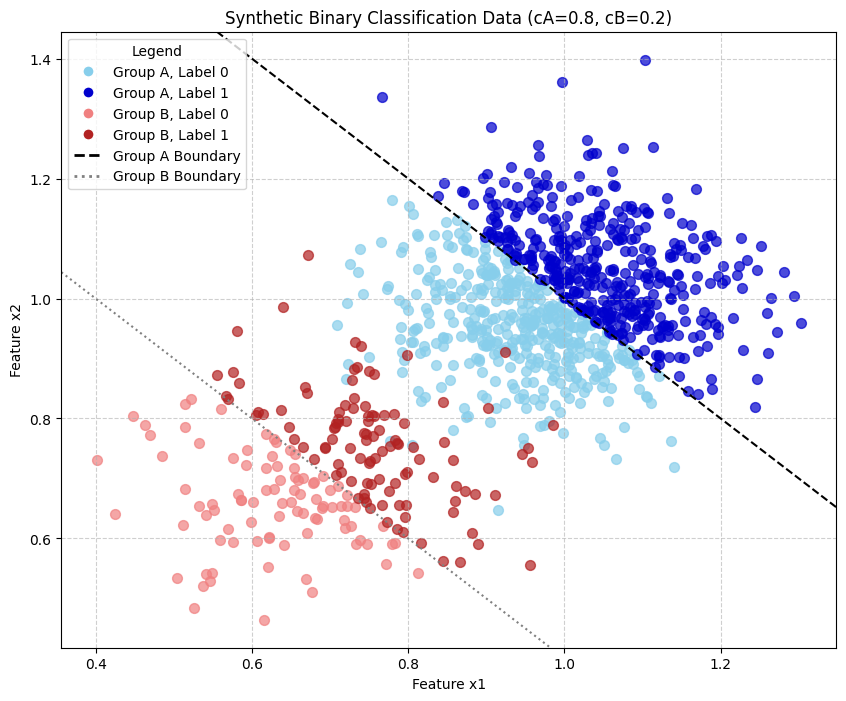

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D # Needed for custom legend

def generate_classification_data(n_samples, mu_A, mu_B, cov_A, cov_B, c_A):
    """
    Generates synthetic binary classification data from a mixture of two
    bivariate Gaussian distributions, similar to Section 4.3.2 of the paper.

    The classification label 'y' is determined by whether the sum of features
    (x1 + x2) exceeds the sum of the means of the originating distribution
    (mu1 + mu2). This creates a scenario where the optimal decision boundary
    is different for the two groups if their means differ.

    Args:
        n_samples (int): Total number of data points to generate.
        mu_A (list or np.ndarray): Mean vector for group A (shape [2,]).
        mu_B (list or np.ndarray): Mean vector for group B (shape [2,]).
        cov_A (list or np.ndarray): Covariance matrix for group A (shape [2, 2]).
        cov_B (list or np.ndarray): Covariance matrix for group B (shape [2, 2]).
        c_A (float): Proportion of samples from group A (between 0 and 1).
                     Proportion from group B will be c_B = 1 - c_A.

    Returns:
        pd.DataFrame: DataFrame containing features (x1, x2),
                      true labels (y), and group identifiers (group).
                      Index is reset and data is shuffled.
    """
    # Ensure inputs are numpy arrays for calculations
    mu_A = np.asarray(mu_A)
    mu_B = np.asarray(mu_B)
    cov_A = np.asarray(cov_A)
    cov_B = np.asarray(cov_B)

    if mu_A.shape != (2,) or mu_B.shape != (2,):
        raise ValueError("Mean vectors mu_A and mu_B must have shape (2,)")
    if cov_A.shape != (2, 2) or cov_B.shape != (2, 2):
         raise ValueError("Covariance matrices cov_A and cov_B must have shape (2, 2)")
    if not 0 <= c_A <= 1:
         raise ValueError("Proportion c_A must be between 0 and 1")

    # Calculate number of samples for each group, ensuring total is n_samples
    n_A = int(np.round(n_samples * c_A))
    n_B = n_samples - n_A # Ensure total adds up

    # --- Generate Data for Group A ---
    X_A = np.random.multivariate_normal(mu_A, cov_A, n_A)
    threshold_A = np.sum(mu_A)
    y_A = (np.sum(X_A, axis=1) > threshold_A).astype(int)
    group_A = ['A'] * n_A

    # --- Generate Data for Group B ---
    X_B = np.random.multivariate_normal(mu_B, cov_B, n_B)
    threshold_B = np.sum(mu_B)
    y_B = (np.sum(X_B, axis=1) > threshold_B).astype(int)
    group_B = ['B'] * n_B

    # --- Combine Data from Both Groups ---
    X = np.vstack((X_A, X_B))
    y = np.concatenate((y_A, y_B))
    group = np.concatenate((group_A, group_B))

    # --- Create Pandas DataFrame ---
    df = pd.DataFrame({
        'x1': X[:, 0],
        'x2': X[:, 1],
        'y': y,
        'group': group
    })

    # --- Shuffle the DataFrame ---
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    return df

# --- Example Usage (Parameters similar to the paper's Section 4.3.2) ---
N_SAMPLES = 1000
MU_A = [1.0, 1.0]
MU_B = [0.7, 0.7]
COV_A = [[0.01, 0], [0, 0.01]]
COV_B = [[0.01, 0], [0, 0.01]]
C_A = 0.8

# Generate the data using the function
synthetic_data = generate_classification_data(N_SAMPLES, MU_A, MU_B, COV_A, COV_B, C_A)

# --- Display Sample Output ---
print("Generated Data Head:")
print(synthetic_data.head())
print(f"\nTotal samples generated: {len(synthetic_data)}")
print("\nValue Counts for Labels (y):")
print(synthetic_data['y'].value_counts(normalize=True))
print("\nValue Counts for Groups:")
print(synthetic_data['group'].value_counts(normalize=True))

# --- Visualize the Data using Matplotlib ---
fig, ax = plt.subplots(figsize=(10, 8))

# Define colors based on group and label
# Group A: Label 0=skyblue, Label 1=mediumblue
# Group B: Label 0=lightcoral, Label 1=firebrick
color_map = {
    ('A', 0): 'skyblue',
    ('A', 1): 'mediumblue',
    ('B', 0): 'lightcoral',
    ('B', 1): 'firebrick'
}
# Use a consistent marker
marker = 'o'

# Scatter plot points group by group and label by label
for (group_name, label_val), group_df in synthetic_data.groupby(['group', 'y']):
    color = color_map[(group_name, label_val)]
    ax.scatter(group_df['x1'], group_df['x2'],
               c=color,        # Use the color from the map
               marker=marker,    # Use consistent marker
               # label=f"Group {group_name}, Label {label_val}", # Label for automatic legend (optional)
               s=50, alpha=0.7) # Adjust size and transparency


# Add titles and labels
ax.set_title(f'Synthetic Binary Classification Data (cA={C_A}, cB={1-C_A:.1f})')
ax.set_xlabel('Feature x1')
ax.set_ylabel('Feature x2')

# Add grid
ax.grid(True, linestyle='--', alpha=0.6)

# Plot the decision boundaries
ax.axline((MU_A[0], MU_A[1]), slope=-1, color='black', linestyle='--', label='Group A True Boundary')
ax.axline((MU_B[0], MU_B[1]), slope=-1, color='grey', linestyle=':', label='Group B True Boundary')

# Create a custom legend manually for clarity
legend_elements = [
    Line2D([0], [0], marker=marker, color='w', label='Group A, Label 0', markerfacecolor=color_map[('A', 0)], markersize=8),
    Line2D([0], [0], marker=marker, color='w', label='Group A, Label 1', markerfacecolor=color_map[('A', 1)], markersize=8),
    Line2D([0], [0], marker=marker, color='w', label='Group B, Label 0', markerfacecolor=color_map[('B', 0)], markersize=8),
    Line2D([0], [0], marker=marker, color='w', label='Group B, Label 1', markerfacecolor=color_map[('B', 1)], markersize=8),
    Line2D([0], [0], color='black', lw=2, linestyle='--', label='Group A Boundary'),
    Line2D([0], [0], color='grey', lw=2, linestyle=':', label='Group B Boundary')
]
ax.legend(handles=legend_elements, title='Legend', loc='best')

# Show the plot
plt.show()
